In [281]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns

# Part 1

### Loading Data

In [282]:
load = load_diabetes(as_frame=True)
print(load.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

### Create Dataframe, add target

In [283]:
diabetes_df = pd.DataFrame(load.data)
diabetes_df['progression'] = np.array(load.target)
diabetes_df.sample(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
424,0.001751,0.050680,0.011039,-0.019442,-0.016704,-0.003819,-0.047082,0.034309,0.024053,0.023775,111.0
300,0.016281,-0.044642,0.073552,-0.041247,-0.004321,-0.013527,-0.013948,-0.001116,0.042896,0.044485,275.0
190,0.009016,-0.044642,-0.012673,0.028758,-0.018080,-0.005072,-0.047082,0.034309,0.023375,-0.005220,292.0


### Data types and missing data

In [284]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


### Describe Dataframe

In [285]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


### Histogram Plots

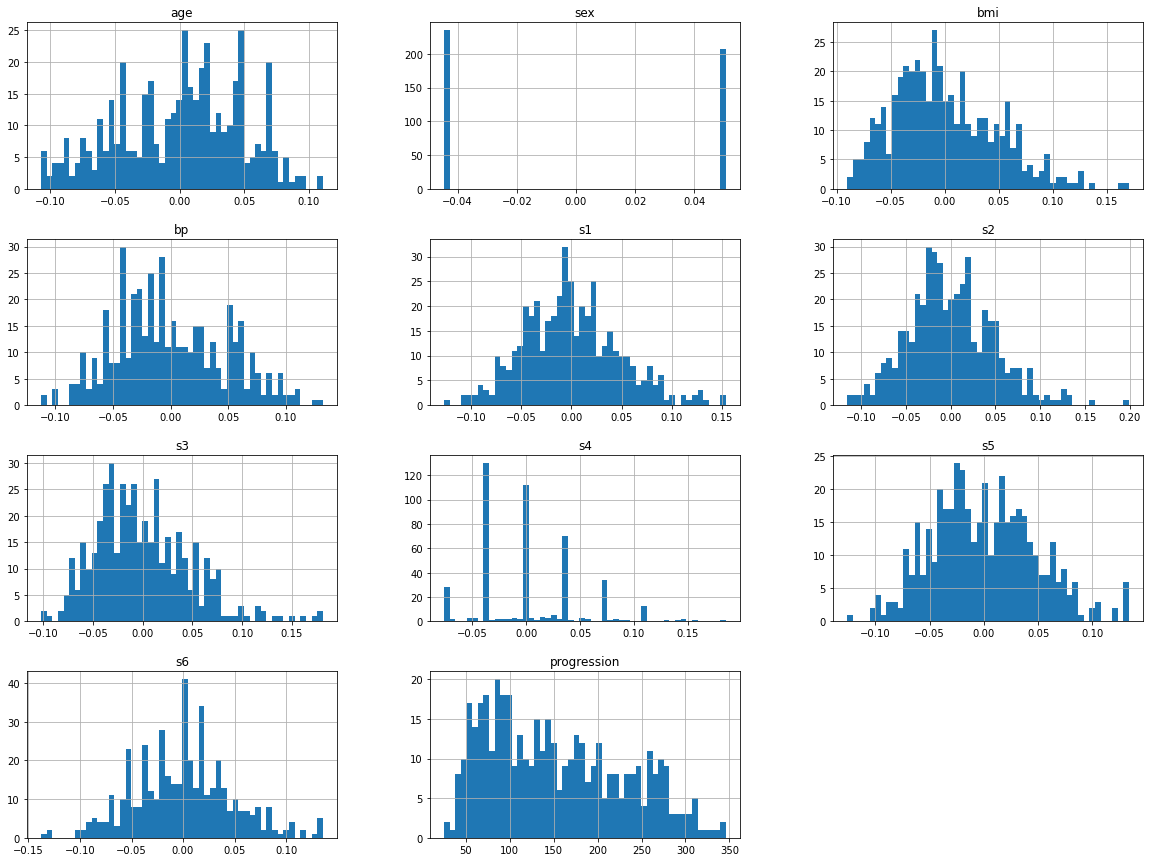

In [286]:
diabetes_df.hist(bins=50, figsize=(20,15))
plt.show();

### Train Test Split & Scale

In [287]:
scaler=StandardScaler(copy=True) 
diabetes_scale=pd.DataFrame(scaler.fit_transform(diabetes_df),index=diabetes_df.index, columns = diabetes_df.columns)
diabetes_train, diabetes_test = train_test_split(diabetes_scale, test_size=0.2 , random_state=1)

In [288]:
diabetes_train.sample(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
280,0.189542,1.065488,0.390700,0.821751,0.372003,0.222553,0.403384,-0.054499,0.342792,-0.370989,1.465690
36,0.265912,-0.938537,0.481339,1.111280,0.169509,-0.600393,0.790394,-0.830301,1.150506,-0.545154,1.465690
225,0.647761,1.065488,0.685277,1.038898,-0.842963,-0.916405,-1.454265,0.721302,1.324848,0.064426,0.725485


In [289]:
print('Train' , diabetes_train.size)
print('Test' , diabetes_test.size)

Train 3883
Test 979


### Correlation Matrix

In [290]:
diabetes_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
age,1.000000,0.160236,0.242503,0.345966,0.286700,0.232955,-0.079775,0.222736,0.298517,0.288280,0.203168
sex,0.160236,1.000000,0.077537,0.234367,0.021532,0.119450,-0.380296,0.331263,0.157531,0.210015,0.027385
bmi,0.242503,0.077537,1.000000,0.427931,0.222435,0.210712,-0.354172,0.390201,0.461359,0.389494,0.602633
bp,0.345966,0.234367,0.427931,1.000000,0.240949,0.176084,-0.181746,0.262387,0.398138,0.391903,0.449539
s1,0.286700,0.021532,0.222435,0.240949,1.000000,0.898966,0.073968,0.533274,0.503478,0.310577,0.202431
s2,0.232955,0.119450,0.210712,0.176084,0.898966,1.000000,-0.151303,0.636579,0.303713,0.265432,0.154794
s3,-0.079775,-0.380296,-0.354172,-0.181746,0.073968,-0.151303,1.000000,-0.732883,-0.421034,-0.288735,-0.408048
s4,0.222736,0.331263,0.390201,0.262387,0.533274,0.636579,-0.732883,1.000000,0.630233,0.425137,0.433786
s5,0.298517,0.157531,0.461359,0.398138,0.503478,0.303713,-0.421034,0.630233,1.000000,0.484220,0.573539
s6,0.288280,0.210015,0.389494,0.391903,0.310577,0.265432,-0.288735,0.425137,0.484220,1.000000,0.388317


In [291]:
diabetes_train.corrwith(diabetes_train['progression'])

age            0.203168
sex            0.027385
bmi            0.602633
bp             0.449539
s1             0.202431
s2             0.154794
s3            -0.408048
s4             0.433786
s5             0.573539
s6             0.388317
progression    1.000000
dtype: float64

### Seaborn Correlation Heatmap

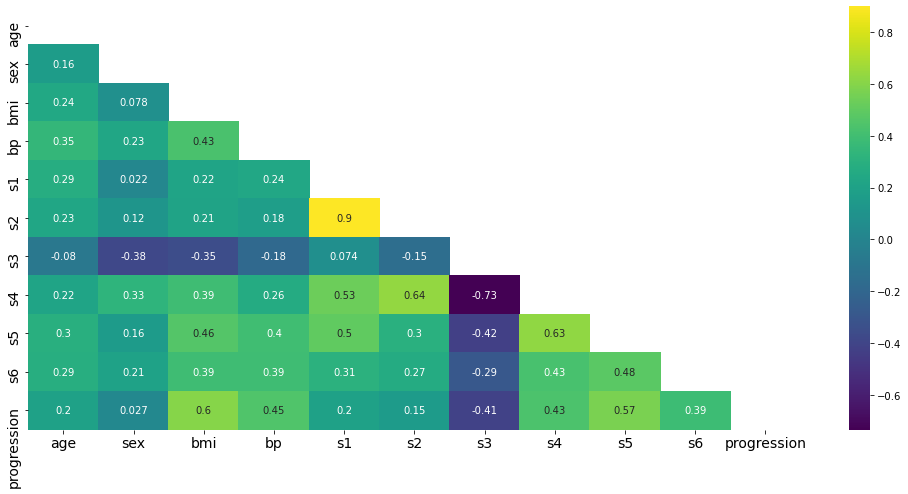

In [292]:
fig, ax = plt.subplots(figsize=(14,7))
mask = np.zeros_like(diabetes_train.corr(), dtype=bool)   
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(diabetes_train.corr(), mask=mask, ax=ax, annot=True, annot_kws={'fontsize':10}, cmap="viridis")
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)
plt.tight_layout()
plt.show();

The three features most correlated with progression are: bmi, s5, bp 

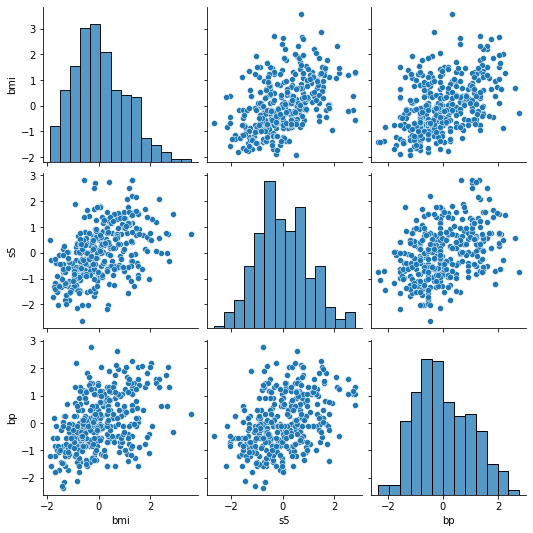

In [293]:
sns.pairplot(diabetes_train[['bmi' , 's5' , 'bp']]);

### Dropping Target 
(But keeping all features as its not clear to use the three highest correlated or use all)

In [294]:
y_train = pd.DataFrame(diabetes_train['progression']).copy()
diabetes_train = diabetes_train.drop(columns='progression')

In [295]:
y_train.sample(3)

,progression
123,-0.884784
38,1.296871
83,0.751457


In [296]:
diabetes_train.sample(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
341,0.647761,1.065488,1.251769,1.183662,-0.466902,0.025046,-0.680245,-0.054499,-0.521205,-0.370989
140,0.876870,1.065488,0.300062,0.894133,-0.640468,-0.027623,-0.912451,-0.054499,-0.699016,0.325674
229,-0.574155,1.065488,-0.334410,-0.625893,0.082726,-0.014456,0.867796,-0.830301,-0.497098,0.238591


# Part 2

### Train linear Regression Model

In [297]:
reg_mdl = LinearRegression().fit(diabetes_train, y_train)
y_train_hat = reg_mdl.predict(diabetes_train)

### RMSE

In [298]:
print('RMSE', mean_squared_error(y_train , y_train_hat, squared=False))

RMSE 0.6914425807698945


### Decision Tree Regressor

In [300]:
tree = DecisionTreeRegressor()
tree.fit(diabetes_train, y_train)
scores = cross_val_score(tree, diabetes_train, y_train, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)
print('Scores:', tree_rmse_scores)
print('Mean:' , tree_rmse_scores.mean())
print('Standard Deviation:', tree_rmse_scores.std())

Scores: [0.99622698 0.8675983  1.25665093 1.01572117 1.01370788 1.00993406
 0.9759474  1.08581389 1.08812333 0.9511272 ]
Mean: 1.0260851137342006
Standard Deviation: 0.09759117986038024


### Random Forest Regressor

In [209]:
forest = RandomForestRegressor()
forest.fit(diabetes_train, y_train.values.ravel())
scores_forest = cross_val_score(forest , diabetes_train, y_train.values.ravel(), scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-scores_forest)
print('Scores:', forest_rmse_scores)
print('Mean:' , forest_rmse_scores.mean())
print('Standard Deviation:', forest_rmse_scores.std())

Scores: [0.78025107 0.81460755 0.87744472 0.67971758 0.81882622 0.80979667
 0.66039617 0.73009024 0.69221665 0.74413335]
Mean: 0.7607480226069652
Standard Deviation: 0.06725110027987988


The Random Forest Regressor performs significantly better.  

### Random Forest Parameters
(I hope this is what is meant by parameters)

In [213]:
forest.feature_importances_

array([0.05297988, 0.01391675, 0.329634  , 0.11633288, 0.03998199,
       0.0457278 , 0.05065697, 0.02660227, 0.25814744, 0.06602003])

In [221]:
forest.estimators_

[DecisionTreeRegressor(max_features='auto', random_state=202833453),
 DecisionTreeRegressor(max_features='auto', random_state=2097120311),
 DecisionTreeRegressor(max_features='auto', random_state=68958069),
 DecisionTreeRegressor(max_features='auto', random_state=1290878877),
 DecisionTreeRegressor(max_features='auto', random_state=1991630049),
 DecisionTreeRegressor(max_features='auto', random_state=1017142144),
 DecisionTreeRegressor(max_features='auto', random_state=1113648686),
 DecisionTreeRegressor(max_features='auto', random_state=1950430756),
 DecisionTreeRegressor(max_features='auto', random_state=1928385513),
 DecisionTreeRegressor(max_features='auto', random_state=538796049),
 DecisionTreeRegressor(max_features='auto', random_state=1048748087),
 DecisionTreeRegressor(max_features='auto', random_state=34792965),
 DecisionTreeRegressor(max_features='auto', random_state=1840484999),
 DecisionTreeRegressor(max_features='auto', random_state=248578676),
 DecisionTreeRegressor(max_

### Grid Search

In [227]:
grid = [{'n_estimators': [3,10,30], 'max_features': [2,4,6,8]}, {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]}]
forest2 = RandomForestRegressor()
grid_search = GridSearchCV(forest2 , grid , scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(diabetes_train, y_train.values.ravel())

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

### Best Performing Model

In [246]:
print('Best Params:', grid_search.best_params_)
print('Featrue Importance:', grid_search.best_estimator_.feature_importances_)
print('Score:', grid_search.best_score_)

Best Params: {'max_features': 2, 'n_estimators': 30}
Featrue Importance: [0.06921662 0.0199791  0.20381769 0.1214943  0.06126826 0.06293544
 0.08395454 0.07539742 0.2290037  0.07293293]
Score: -0.5714307035616284


### RMSE

In [247]:
for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
    print(np.sqrt(-mean_score), params)

0.8686969269602466 {'max_features': 2, 'n_estimators': 3}
0.7652275065019458 {'max_features': 2, 'n_estimators': 10}
0.7559303562905967 {'max_features': 2, 'n_estimators': 30}
0.8668208825087094 {'max_features': 4, 'n_estimators': 3}
0.7985760738786004 {'max_features': 4, 'n_estimators': 10}
0.7604502923460237 {'max_features': 4, 'n_estimators': 30}
0.8413791471577636 {'max_features': 6, 'n_estimators': 3}
0.7973739016096673 {'max_features': 6, 'n_estimators': 10}
0.7693582563862799 {'max_features': 6, 'n_estimators': 30}
0.8324671155331065 {'max_features': 8, 'n_estimators': 3}
0.8076164456532664 {'max_features': 8, 'n_estimators': 10}
0.7793649100527279 {'max_features': 8, 'n_estimators': 30}
0.8973463484695584 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.8124278327917795 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.8876142860366599 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.790641229616239 {'bootstrap': False, 'max_features': 3, 'n_

### Feature Importance and the Correlation Matrix

In [256]:
print('Featrue Importance:', grid_search.best_estimator_.feature_importances_)

Featrue Importance: [0.06921662 0.0199791  0.20381769 0.1214943  0.06126826 0.06293544
 0.08395454 0.07539742 0.2290037  0.07293293]


In [255]:
sorted(zip(grid_search.best_estimator_.feature_importances_, diabetes_train.columns), reverse=True)

[(0.2290037034696869, 's5'),
 (0.20381769492218058, 'bmi'),
 (0.12149429519930931, 'bp'),
 (0.08395454003440903, 's3'),
 (0.07539742319699727, 's4'),
 (0.07293292601216833, 's6'),
 (0.06921662336983939, 'age'),
 (0.06293544204672928, 's2'),
 (0.06126825503647286, 's1'),
 (0.019979096712207205, 'sex')]

The most important features of the best estimator are bmi, s5, bp.  The three features most correlated with progression are: bmi, s5, bp.  The three highest feature importance and three highest correlated features are the same.  This is expected.  Correlation is often a good factor to use for feature selection.    

### Best Performaing Model (Comparison)

In [302]:
diabetes_test_progrssion = diabetes_test['progression']
diabetes_test = diabetes_test.drop(columns='progression')

In [278]:
diabetes_test_hat = reg_mdl.predict(diabetes_test)
lin_reg_test_RMSE = mean_squared_error(diabetes_test_progrssion , diabetes_test_hat, squared=False)
print('Part 2 Linear Regression Performance:', lin_reg_test_RMSE)

Part 2 Linear Regression Performance: 0.7103921166256985


In [303]:
tree_test_hat = tree.predict(diabetes_test)
tree_test_RMSE = mean_squared_error(diabetes_test_progrssion , tree_test_hat, squared=False)
print('Part 2 Decision tree Performance:', tree_test_RMSE)

Part 2 Decision tree Performance: 1.0664212123165169


In [306]:
rnd_frst_test_hat = forest.predict(diabetes_test)
rnd_frst_test_RMSE = mean_squared_error(diabetes_test_progrssion, rnd_frst_test_hat, squared=False)
print('Part 2 Random Forrest Performance:', rnd_frst_test_RMSE)

Part 2 Random Forrest Performance: 0.7887344289410485


In [307]:
best_estimator_hat = grid_search.best_estimator_.predict(diabetes_test)
part_3_RMSE = mean_squared_error(diabetes_test_progrssion , best_estimator_hat, squared=False)
print('Part 3 Best Random Forest Performance:', part_3_RMSE)

Part 3 Best Random Forest Performance: 0.7448188264240054


To my surprise it looks like the regular linear regression model is a slightly better fit.  I suspect the random forest isn't generalizing as well, but it is also possible that different rng within the k folds could flip the results.  However, I did not expect this.  

### Saving Models

In [309]:
pickle.dump(reg_mdl, open('reg_model.pkl', 'wb'))
pickle.dump(tree, open('tree_model.pkl', 'wb'))
pickle.dump(forest, open('simple_forest_model.pkl', 'wb'))
pickle.dump(grid_search.best_estimator_, open('best_forest_model.pkl', 'wb'))